In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix, PrecisionRecallDisplay, RocCurveDisplay, roc_curve, precision_recall_curve
from prettytable import PrettyTable
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("bioresponse.csv")
ydf = df['Activity']
xdf = df.drop(columns = ['Activity'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(
        xdf, ydf, test_size=0.2, random_state=68)
df.head(7)

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.00,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.00,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.00,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.50,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.00,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
5,0,0.133333,0.771035,0.20,0.25,0.122153,0.677398,0.267224,0.611112,0.701421,...,0,0,0,0,0,0,0,0,0,0
6,1,0.066700,0.567401,0.10,0.00,0.116578,0.689802,0.274886,0.548509,0.785429,...,0,0,0,0,0,0,0,0,0,0


In [3]:
def output(model, X_test, y_test, name1):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
    PrecisionRecallDisplay.from_estimator(model, X_test, y_test).plot(ax=ax1)
    RocCurveDisplay.from_estimator(model, X_test, y_test).plot(ax=ax2)
    # plt.title(name1, fontsize = 15)
    # plt.show()

+-------+--------------------+--------------------+--------------------+--------------------+-------------------+
| Model | Accuracy           | Precision          | Recall             | F1                 | LogLoss           |
+-------+--------------------+--------------------+--------------------+--------------------+-------------------+
|   SDT | 0.7683089214380826 | 0.7706013363028953 | 0.7706013363028953 | 0.7990762124711317 | 8.00243602030595  |
|   DDT | 0.7443408788282291 | 0.7877237851662404 | 0.7877237851662404 | 0.7623762376237623 | 8.830241590425508 |
|   RFS | 0.7203728362183754 | 0.7357630979498861 | 0.7357630979498861 | 0.7546728971962617 | 9.658103590190608 |
|   RFD | 0.8055925432756325 | 0.8188235294117647 | 0.8188235294117647 | 0.8266033254156769 | 6.714677659998781 |
|  RFDG | 0.810918774966711  | 0.8281622911694511 | 0.8281622911694511 | 0.8301435406698564 | 6.530710811041666 |
+-------+--------------------+--------------------+--------------------+----------------

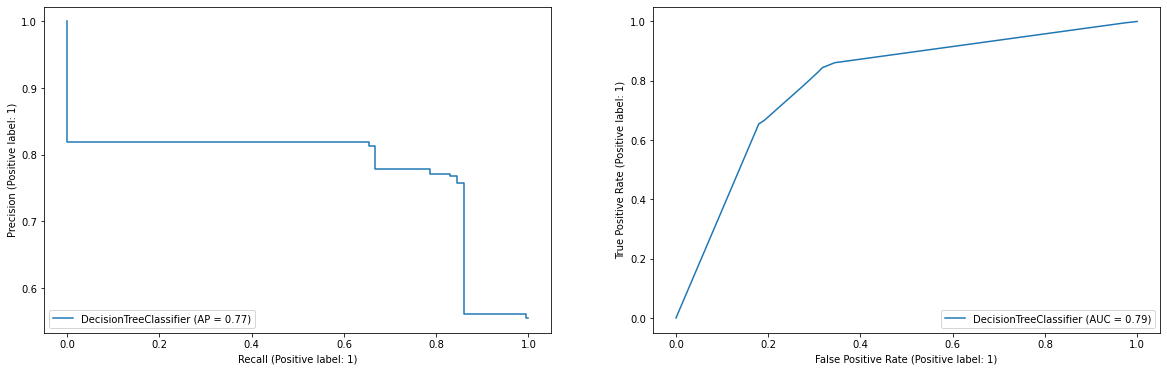

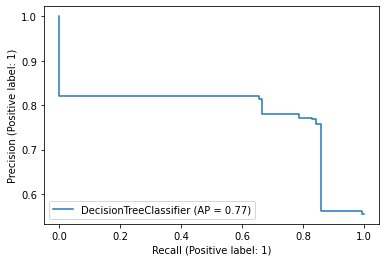

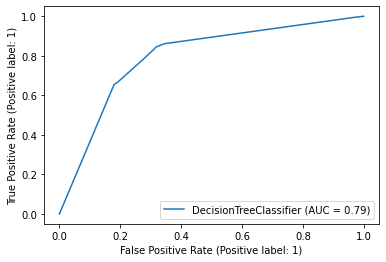

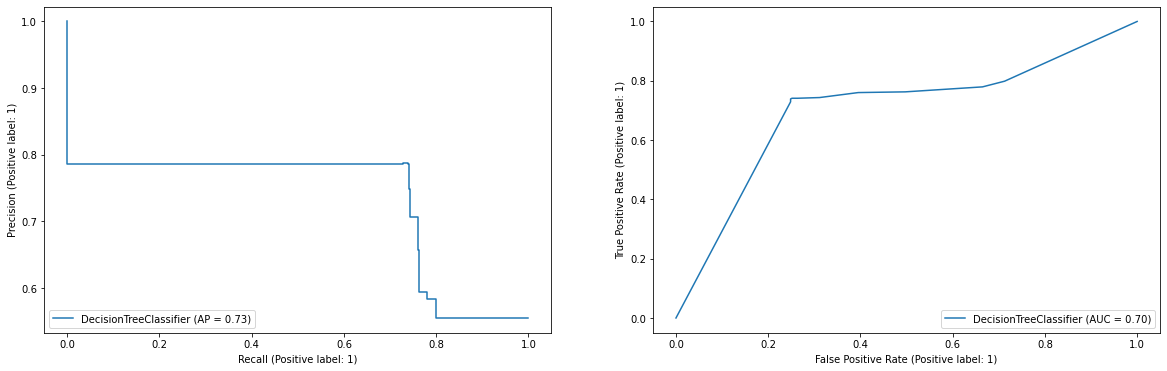

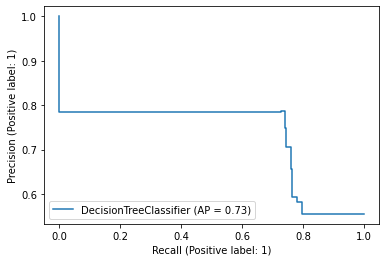

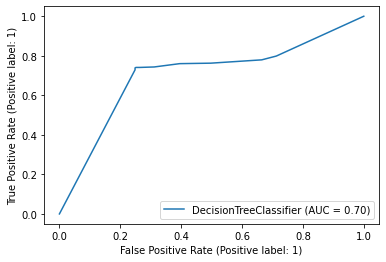

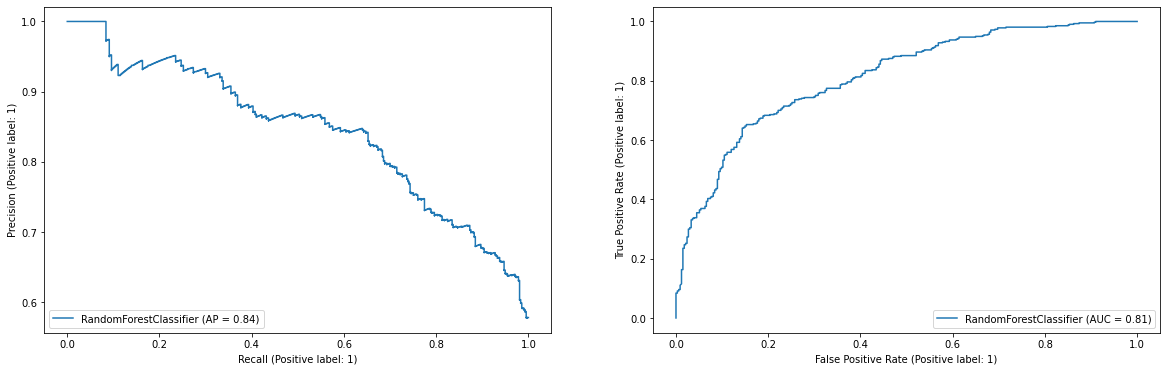

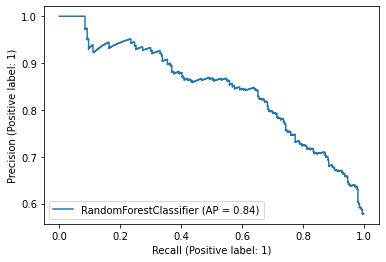

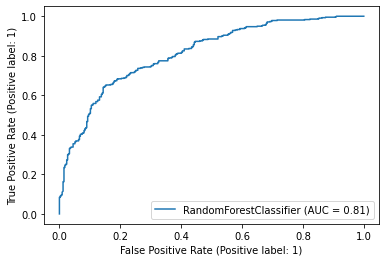

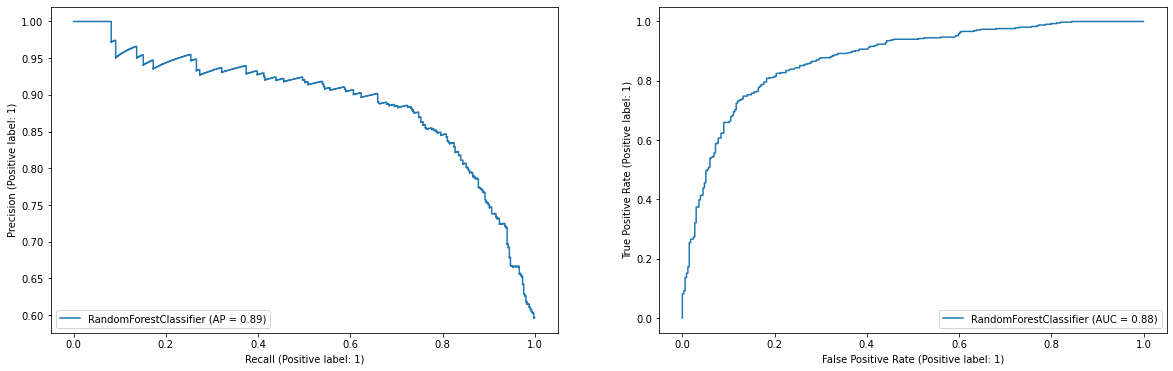

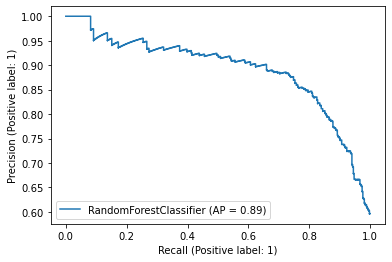

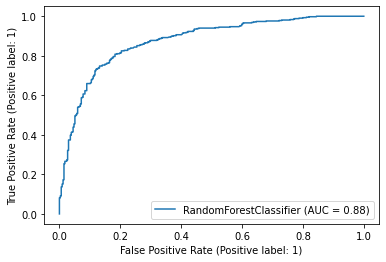

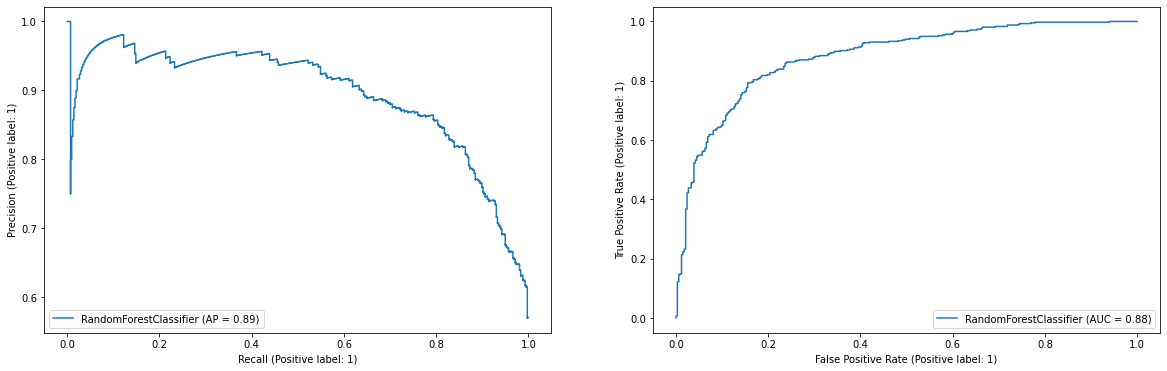

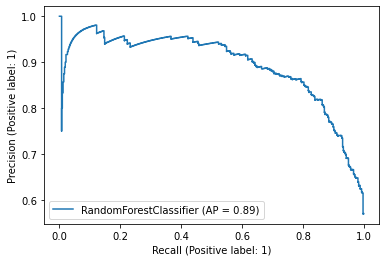

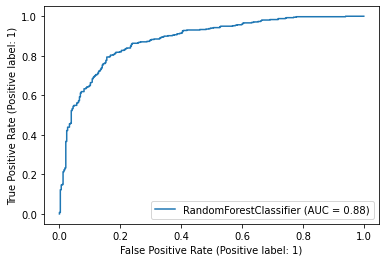

In [4]:
table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1", "LogLoss"]
# plt.figure(figsize=(20,30))
# it = 0
models = {
    "SDT": DecisionTreeClassifier(max_depth=3),
    "DDT": DecisionTreeClassifier(max_depth=20),
    "RFS": RandomForestClassifier(max_depth=3),
    "RFD": RandomForestClassifier(max_depth=20),
    "RFDG": RandomForestClassifier(max_depth=20, criterion='gini', bootstrap=False, n_jobs=1),
}
for i in models.keys():
    model = models[i]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # y_pred_proba = model.predict_proba(X_test)
    table.add_row([str(i), 
                    accuracy_score(y_test, y_pred), 
                    precision_score(y_test, y_pred), 
                    recall_score(y_pred, y_test), 
                    f1_score(y_test, y_pred), 
                    log_loss(y_test, y_pred)])
    output(model, X_test, y_test, str(i))
    # it +=1
    
table.align = 'l'
table.align['Model'] = 'r'
print(table)